
# **Analyzing Diabetes Data with Machine Learning**

Anu Bat-Yeruult





In [3]:
install.packages("DBI")
install.packages("vctrs")
install.packages('tidyverse')
install.packages("pROC")
install.packages("party")
install.packages("DAAG")
install.packages("VIM")
install.packages("caret")
install.packages("FNN")
install.packages("randomForest")
install.packages("e1071")
install.packages("neuralnet")


library(tidyverse)
library(dplyr)
library(ggplot2)
library(pROC)
library("party")
library("DAAG")
library(VIM)
library(caret)
library(FNN)
library(randomForest)
library(e1071)
library("neuralnet")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [10]:
diabetes <- read.csv("PimaIndiansDiabetes.csv", header = T) #read the data.csv in and call it cancer_data
head(diabetes)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0


## Part 1 Numeric vs. Categorical



The numeric variables are: pregnancies, glucose, blood pressure, skin thickness, insulin, BMI, Diabetes Pedigree Function and age. The main reason why these variables are numeric is that the dataset itself is a medical dataset, which contains quantitative measurements such as these variables, that are often used in medical diagnosis. Also, these measurements are quantitative and some variables (insulin, BMI, DPF) are continuous.

On the other hand, the variable “outcome” is the only categorical variable in the data.
The reason why the outcome is not numeric (despite being represented by '1' and '0' in the dataset) is that it represents a binary category (diabetes or no diabetes). Particularly, categorical variables are usually used to represent discrete attributes that cannot by measured on a scale. As such, “outcome” fits such description.


In [13]:
#Converting the numeric variables to numeric type
diabetes$Pregnancies <- as.numeric(diabetes$Pregnancies)
diabetes$Glucose <- as.numeric(diabetes$Glucose)
diabetes$BloodPressure <- as.numeric(diabetes$BloodPressure)
diabetes$SkinThickness <- as.numeric(diabetes$SkinThickness)
diabetes$Insulin <- as.numeric(diabetes$Insulin)
diabetes$BMI <- as.numeric(diabetes$BMI)
diabetes$DiabetesPedigreeFunction <- as.numeric(diabetes$DiabetesPedigreeFunction)


#Converting "Outcome" categorical variable to factor type
diabetes$Outcome <- as.factor(diabetes$Outcome)


## Part 2 Creating boxplots


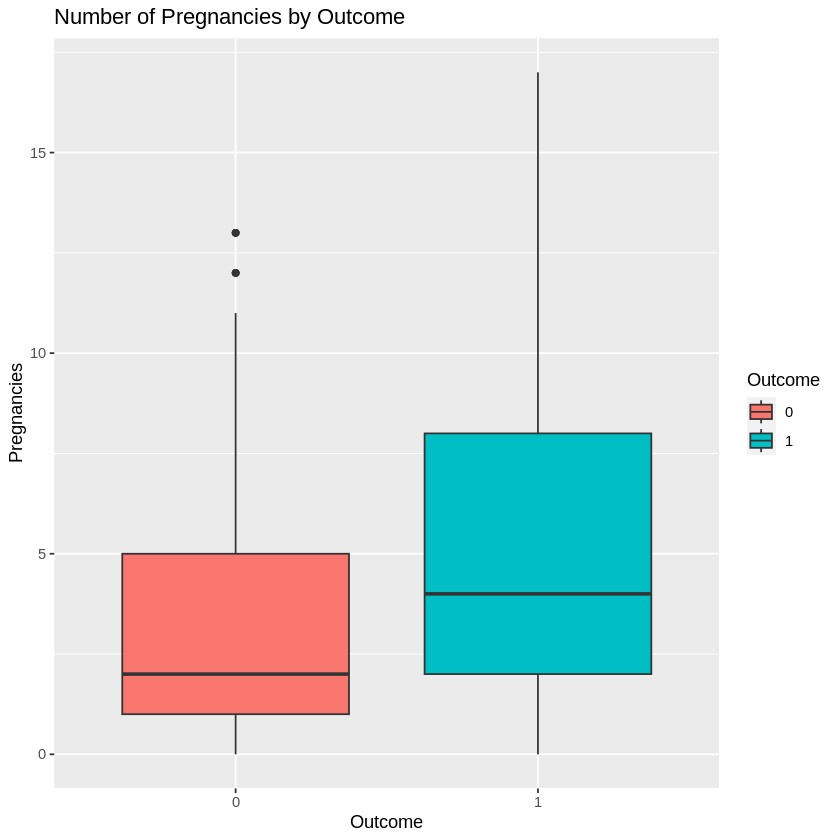

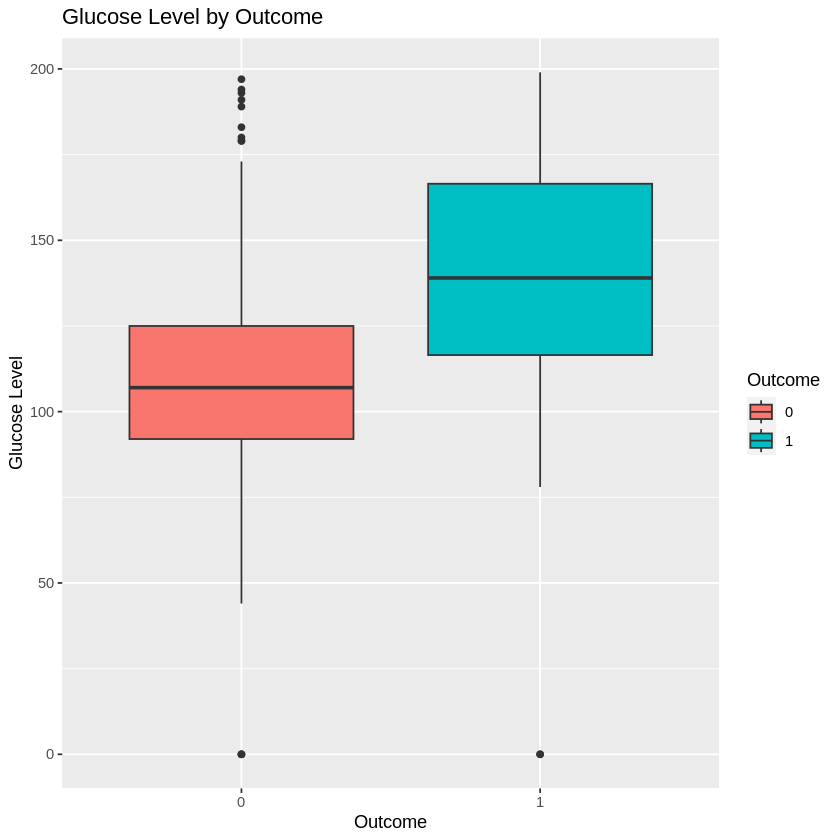

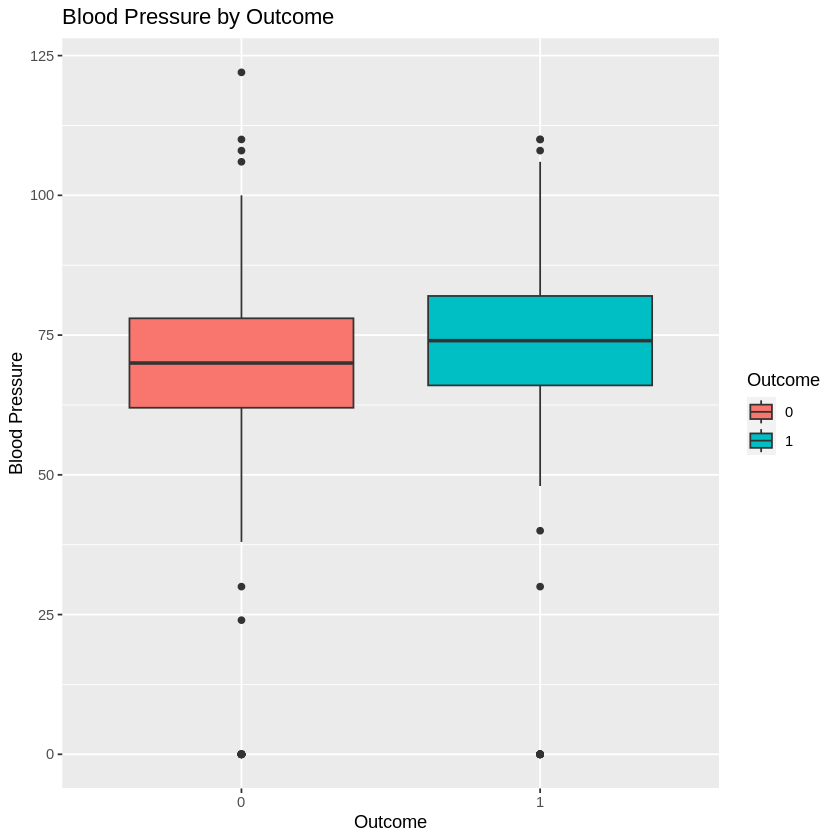

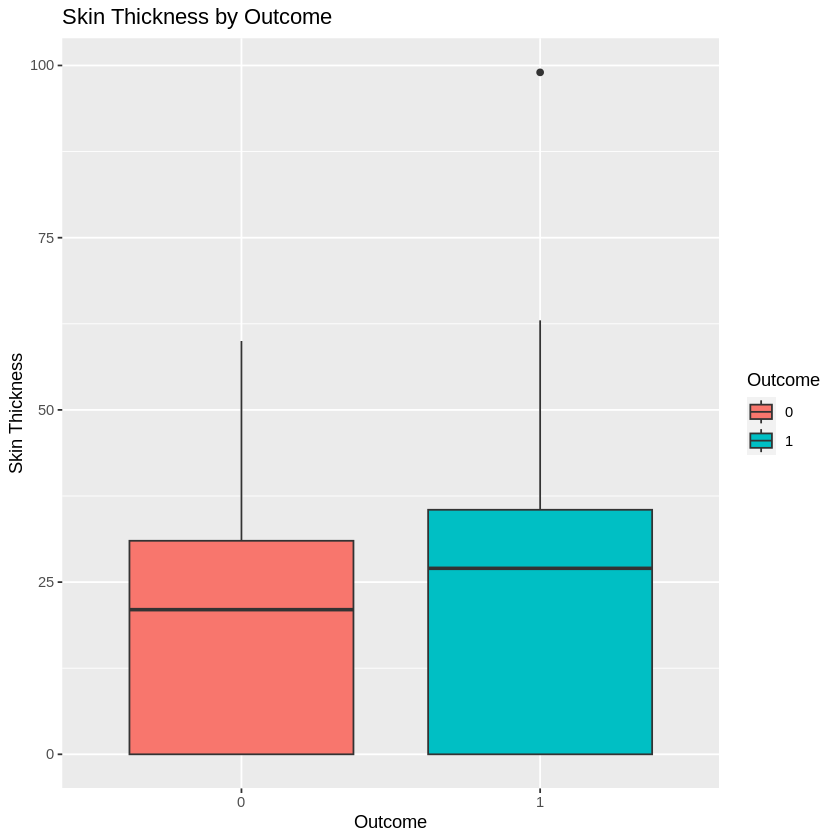

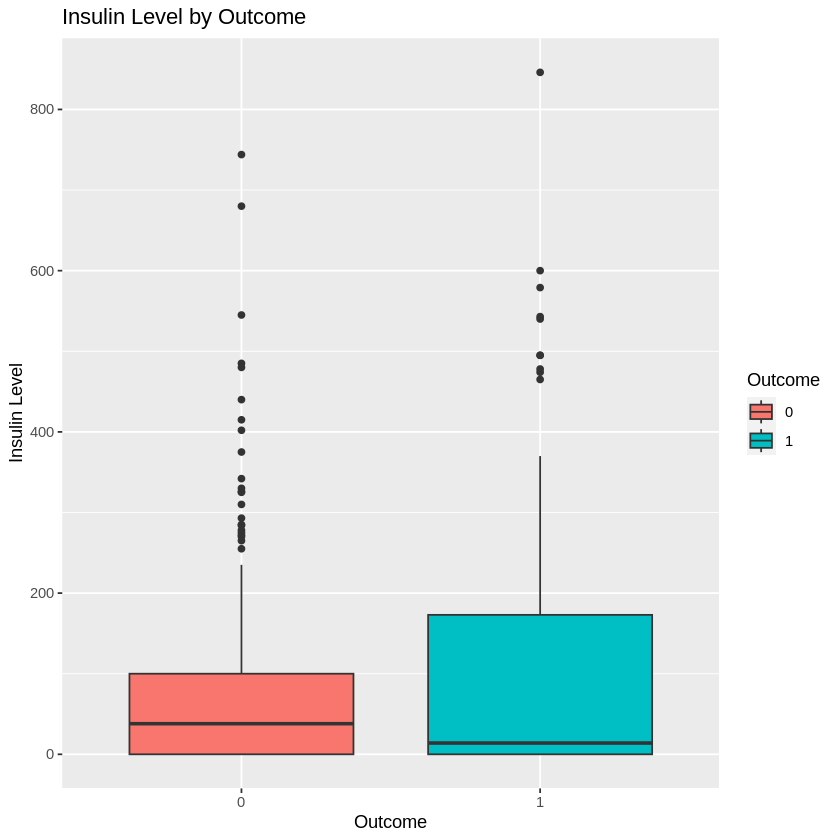

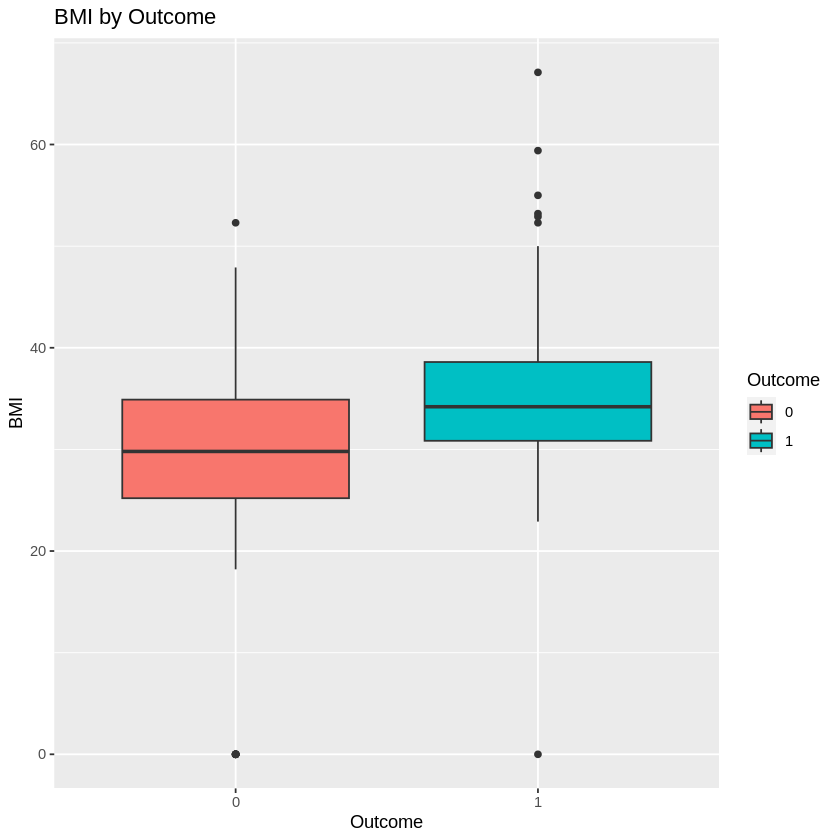

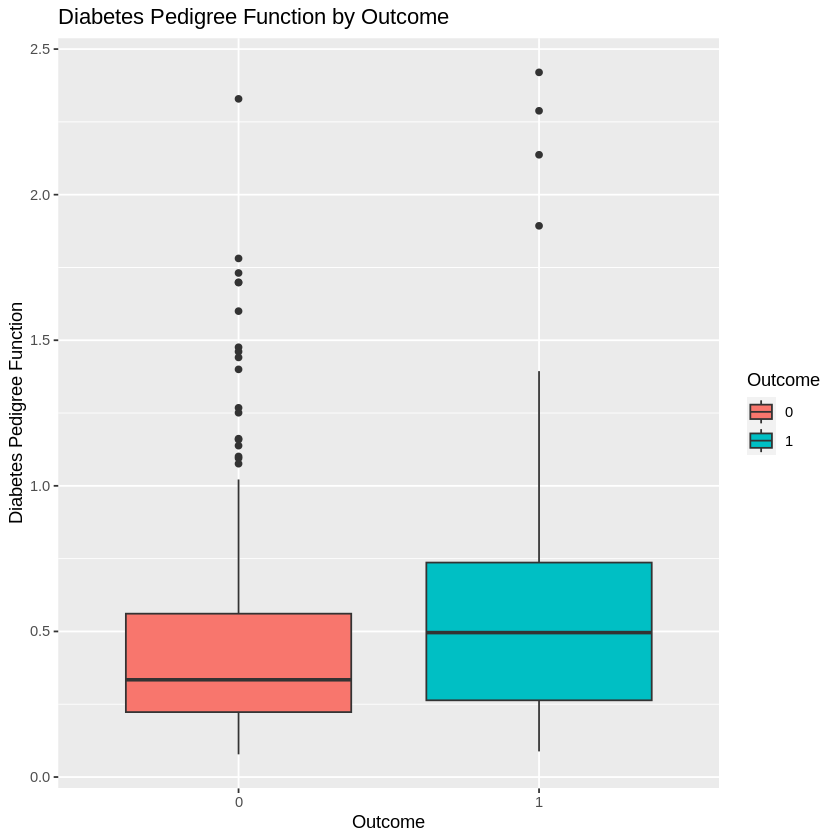

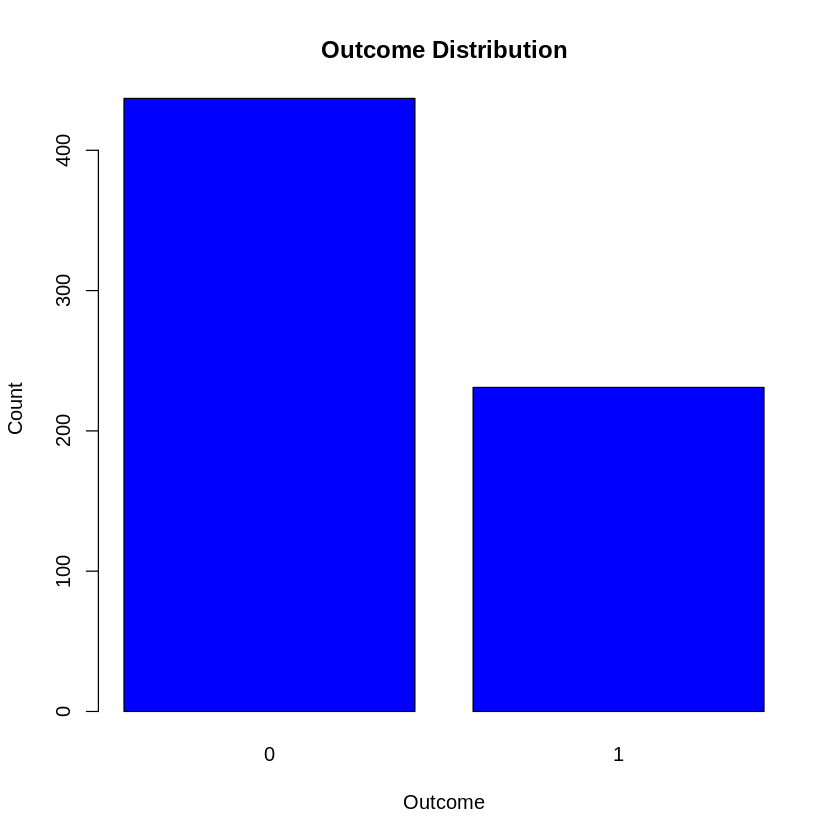

In [14]:
# Create a boxplot for each of variable to visualize the distribution of the values between diabetic and non-diabetic.
ggplot(diabetes, aes(x = Outcome, y = Pregnancies, fill = Outcome)) +
  geom_boxplot() +
  labs(title = "Number of Pregnancies by Outcome", x = "Outcome", y = "Pregnancies")

ggplot(diabetes, aes(x = Outcome, y = Glucose, fill=Outcome)) +
  geom_boxplot() +
  labs(title = "Glucose Level by Outcome", x = "Outcome", y = "Glucose Level")

ggplot(diabetes, aes(x = Outcome, y = BloodPressure, fill=Outcome)) +
  geom_boxplot() +
  labs(title = "Blood Pressure by Outcome", x = "Outcome", y = "Blood Pressure")

ggplot(diabetes, aes(x = Outcome, y = SkinThickness, fill=Outcome)) +
  geom_boxplot() +
  labs(title = "Skin Thickness by Outcome", x = "Outcome", y = "Skin Thickness")

ggplot(diabetes, aes(x = Outcome, y = Insulin, fill=Outcome)) +
  geom_boxplot() +
  labs(title = "Insulin Level by Outcome", x = "Outcome", y = "Insulin Level")

ggplot(diabetes, aes(x = Outcome, y = BMI, fill=Outcome)) +
  geom_boxplot() +
  labs(title = "BMI by Outcome", x = "Outcome", y = "BMI")

ggplot(diabetes, aes(x = Outcome, y = DiabetesPedigreeFunction, fill=Outcome)) +
  geom_boxplot() +
  labs(title = "Diabetes Pedigree Function by Outcome", x = "Outcome", y = "Diabetes Pedigree Function")

# create a table of counts for each value of Outcome
outcome_counts <- table(diabetes$Outcome)

# create a barplot of the counts
barplot(outcome_counts, main="Outcome Distribution", xlab="Outcome", ylab="Count", col="blue")


The boxplots for the numeric variables can be used to predict which specific variable can be used to predict whether a patient is diabetic or not.

Particularly, I’d need to look for the feature that shows the largest difference between diabetic and non diabetic diagnoses. Strangely, the majority of the boxplots follow a trend where the feature-specific values are overlapping between the diagnoses. This means that these features are not good indicators for the diagnosis for diabetes.

Comparing the boxplots, I think Glucose would be the best indicator out of all the variables because, despite the small overlap between higher percentile of 0 and lower percentile of 1, it shows the largest relative difference in values between diabetic and non diabetic. A key reasoning for such trends would be that the data is not normalized, meaning there is no assurance that all variables can be accurately compared to one another.

Regarding the bar-plot of the “Outcome,” the graph shows the size comparison between diabetic and non-diabetic features. Surprisingly, the count for 0 (non-diabetic) is almost twice as big as 1 (diabetic). Such large imbalance between the binary outcomes may contribute to the overlaps seen in the boxplots as there is significantly less data to support values that relate to 1 (diabetic).

## Part3

Number of pregnancies - can be 0
Glucose - cannot be 0
Blood pressure - cannot be 0
Skin Thickness - cannot be 0
Insulin - cannot be 0
BMI - cannot be 0
Age - cannot be 0

We observe data set & found that some variable i.e Glucose,BloodPressure,SkinThickness,Insulin,BMI can not be exactly “zero” as its not possible practically so we need to replace these Zero values with NA to replace them with some value using kNN computation method.

Use KNN Imputation method to remove NA
This imputer utilizes the k-Nearest Neighbors method to replace the missing values in the datasets with the mean value from the parameter ‘n_neighbors’ nearest neighbors found in the training set. By default, it uses a Euclidean distance metric to impute the missing values.
https://medium.com/@kyawsawhtoon/a-guide-to-knn-imputation-95e2dc496e

The optimal K value usually found is the square root of N, where N is the total number of samples.
https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb


In [15]:
summary(diabetes)

#according to the summary, Glucose, BloodPressure, SkinThickness, Insulin, and BMI contain 0, which does not make sense for the variables. So, I will need to replace the zero values with NA.

diabetes0 <- diabetes[, c("Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI")]

diabetes0[diabetes0=='0']=NA #Replacing 0 with NA

summary(diabetes0) #show the NA present in each variable

diabetes0<-kNN(diabetes0,k=sqrt(nrow(diabetes0))) #KNN Imputation method to remove NA. The square root of number of rows in the dataset because the "optimal K value usually found is the square root of N, where N is the total number of samples".

#extract the necessary variables
diabetes0=diabetes0[,1:5]

#Replace processed variables back into the dataset

diabetes$Glucose=diabetes0$Glucose
diabetes$BloodPressure=diabetes0$BloodPressure
diabetes$SkinThickness=diabetes0$SkinThickness
diabetes$Insulin=diabetes0$Insulin
diabetes$BMI=diabetes0$BMI

summary(diabetes)


  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 64.00   1st Qu.: 0.00  
 Median : 3.000   Median :116.0   Median : 72.00   Median :23.00  
 Mean   : 3.813   Mean   :120.4   Mean   : 68.75   Mean   :20.57  
 3rd Qu.: 6.000   3rd Qu.:140.0   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    Insulin            BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.00   Min.   : 0.00   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.00   1st Qu.:27.10   1st Qu.:0.2387           1st Qu.:24.00  
 Median : 36.50   Median :32.00   Median :0.3770           Median :29.00  
 Mean   : 79.65   Mean   :31.86   Mean   :0.4773           Mean   :33.09  
 3rd Qu.:126.00   3rd Qu.:36.50   3rd Qu.:0.6412           3rd Qu.:40.00  
 Max.   :846.00   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
 Outco

    Glucose      BloodPressure    SkinThickness      Insulin     
 Min.   : 44.0   Min.   : 24.00   Min.   : 7.00   Min.   : 14.0  
 1st Qu.: 99.0   1st Qu.: 64.00   1st Qu.:21.00   1st Qu.: 75.0  
 Median :116.0   Median : 72.00   Median :29.00   Median :121.0  
 Mean   :121.3   Mean   : 72.21   Mean   :29.11   Mean   :153.8  
 3rd Qu.:140.5   3rd Qu.: 80.00   3rd Qu.:36.00   3rd Qu.:190.0  
 Max.   :199.0   Max.   :122.00   Max.   :99.00   Max.   :846.0  
 NA's   :5       NA's   :32       NA's   :196     NA's   :322    
      BMI      
 Min.   :18.2  
 1st Qu.:27.3  
 Median :32.0  
 Mean   :32.3  
 3rd Qu.:36.6  
 Max.   :67.1  
 NA's   :9     

  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   : 44.0   Min.   : 24.00   Min.   : 7.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 64.00   1st Qu.:22.00  
 Median : 3.000   Median :116.0   Median : 72.00   Median :30.00  
 Mean   : 3.813   Mean   :121.2   Mean   : 72.33   Mean   :28.95  
 3rd Qu.: 6.000   3rd Qu.:140.0   3rd Qu.: 80.00   3rd Qu.:33.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   : 14.0   Min.   :18.20   Min.   :0.0780           Min.   :21.00  
 1st Qu.: 81.0   1st Qu.:27.40   1st Qu.:0.2387           1st Qu.:24.00  
 Median :122.0   Median :32.05   Median :0.3770           Median :29.00  
 Mean   :142.2   Mean   :32.31   Mean   :0.4773           Mean   :33.09  
 3rd Qu.:170.0   3rd Qu.:36.50   3rd Qu.:0.6412           3rd Qu.:40.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
 Outcome
 0:4

Firstly, the variables where 0 makes sense would be Pregnancies and Outcome because for the former, it is sensible that a patient can have no kids and for the latter, 0 is a categorical number.

For the rest of the variables, 0 does not make sense because:
1. For Blood pressure, 0 means the patient is dead.
2. For Skin Thickness, it would be impossible to find an area where there is no skin.
3. Insulin of 0 would indicate death and, thus, makes no sense.
4. 0 is not a valid measurement of BMI as the lowest measurement is around 9-10.
5. For Age, 0 makes no sense because not only it would not make sense to take samples from an infant but the dataset itself does not have anyone that is 0 years-old.

As such, I will be replacing 0 with NA as my first course of action. Then, I would use KNN imputation with the k value of square root of the number of rows to replace the NAs in each column (variable). The reason why I’m using it over the Mean imputation would be that I find it to be less fitting for the dataset as a whole. Particularly, I found out that after using the KNN imputation, key factors such as the mean and median of each variable did not change (or had minor immaterial changes).


## Part 4 Data Processing



In [46]:
sub_diabetes = diabetes[,-9]
head(sub_diabetes)

sub_diabetes_norm <- as.data.frame(lapply(sub_diabetes, function(x) (x - mean(x)) / sd(x)))
head(sub_diabetes_norm)

diabetes[,1:8]<-sub_diabetes_norm[,1:8]

sd_values_normalized <- apply(diabetes[,-9], 2, sd)
sd_values_normalized

head(diabetes)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.6498332,0.8763319,-0.02767355,0.652114154,0.3037062,0.1878441,0.4384050,1.443781494
2,-0.8357540,-1.1835179,-0.52729339,0.005165261,-0.7493731,-0.8278348,-0.3700352,-0.178571292
3,1.2440682,2.0206929,-0.69383334,-0.102659555,0.3458293,-1.3066549,0.5702159,-0.093184304
4,-0.8357540,-1.0527338,-0.52729339,-0.641783633,-0.5071649,-0.6101893,-0.9089953,-1.032441180
5,-1.1328715,0.5166756,-2.69231270,0.652114154,0.2721138,1.5662655,5.3036918,-0.007797315
6,0.3527158,-0.1699410,0.13886639,-0.749608449,-0.3913261,-0.9729318,-0.8094049,-0.263958281


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.6498332,0.8763319,-0.02767355,0.652114154,0.3037062,0.1878441,0.4384050,1.443781494
2,-0.8357540,-1.1835179,-0.52729339,0.005165261,-0.7493731,-0.8278348,-0.3700352,-0.178571292
3,1.2440682,2.0206929,-0.69383334,-0.102659555,0.3458293,-1.3066549,0.5702159,-0.093184304
4,-0.8357540,-1.0527338,-0.52729339,-0.641783633,-0.5071649,-0.6101893,-0.9089953,-1.032441180
5,-1.1328715,0.5166756,-2.69231270,0.652114154,0.2721138,1.5662655,5.3036918,-0.007797315
6,0.3527158,-0.1699410,0.13886639,-0.749608449,-0.3913261,-0.9729318,-0.8094049,-0.263958281


Pregnancies                  Glucose            BloodPressure 
                       1                        1                        1 
           SkinThickness                  Insulin                      BMI 
                       1                        1                        1 
DiabetesPedigreeFunction                      Age 
                       1                        1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,0.6498332,0.8763319,-0.02767355,0.652114154,0.3037062,0.1878441,0.4384050,1.443781494,1
2,-0.8357540,-1.1835179,-0.52729339,0.005165261,-0.7493731,-0.8278348,-0.3700352,-0.178571292,0
3,1.2440682,2.0206929,-0.69383334,-0.102659555,0.3458293,-1.3066549,0.5702159,-0.093184304,1
4,-0.8357540,-1.0527338,-0.52729339,-0.641783633,-0.5071649,-0.6101893,-0.9089953,-1.032441180,0
5,-1.1328715,0.5166756,-2.69231270,0.652114154,0.2721138,1.5662655,5.3036918,-0.007797315,1
6,0.3527158,-0.1699410,0.13886639,-0.749608449,-0.3913261,-0.9729318,-0.8094049,-0.263958281,0


##Part 5 Building the model

###5.1. Balance and Leave out 30%


I will be using several different types of models and I will be leaving out the 30% of the dataset for testing. The key reasoning is that I believe the models really fit the binary-aspect of the “Outcomes” because we learned these models using a dataset that also had binary results (dead or alive). I will be employing the following models:

**Logistic Regression (LR)**

Logistic regression is a classification algorithm that is used to predict the outcome variable (in this case, whether or not an individual has diabetes) based on one or more input variables (in this case, the other clinical measurements such as Blood Pressure). As such, I found it fitting to create a LR model and test it. Initially, I created a LR model for each of the attributes to identify which one has the highest AUC (i.e. the one performing the best). Surprisingly, when I did so, I found out that Glucose’ model had the highest AUC which correlated with my prediction based off the boxplots. Then I created a LR model containing all of the attributes and compared its AUC to that of Glucose. The result was that the former had the higher AUC and, thus, I decided to compare it with the AUCs of the other models.  Out of the coefficients, Glucose has the highest coefficient. A high positive coefficient suggests that the  corresponding predictor variable has a strong relationship with the outcome variable compared to the other predictor variables in the model. However, as the coefficient is significantly higher than the others - while the others have similar coefficients - its magnitude may suggest that the model was overfitted to the training data. As such, cross-validation is needed to assess the performance pf the model on multiple splits of data.

**Decision Tree (DTree)**

A decision tree is a classification algorithm that recursively partitions the input space based on the values of the input variables. I mainly chose to create the model because it is easier to make (as there is no need for hypertuning any parameters) and interpret and it can handle both categorical and numeric data.

**Random Forest**

Random forest is an ensemble learning algorithm that consists of many decision trees. Each tree is trained on a random subset of the input variables and a random subset of the training data. Random forests are less prone to overfitting than decision trees and can handle both categorical and numeric data. I also plotted variable importance of the best model. The first plot shows how much accuracy is affected by changing the values in the different variable. Glucose is the most important because changing its values alters the results the most. The second plot shows a measurement that is similar to Information gain. Insulin has the most informative variable if the patient will live or die.

**KNN**

KNN is a classification algorithm that assigns the class of a new data point based on the class of its nearest neighbors in the input space. However, it can be slow to classify new data points, and the choice of k can be important and may require tuning. As such, I had to hypertune the k by creating a for loop that would create KNN models using k values from 5 to 50 (with an interval of 5) and return the model with the highest performing k-value (based on the AUC of each model created for each k value).

**SVM**
SVM is a classification algorithm that finds the hyperplane that maximally separates the data into two classes. It is a powerful algorithm that can handle both linear and nonlinear separable data. However, it can be sensitive to the choice of kernel and may be slow to train on large datasets.  As such, I had to hypertune both the type of kernel and the cost by (1) creating a matrix for the kernel types (linear, polynomial and radial) and cost values from 5 to 100 (with an interval of 5) and (2) using for loops to identify the highest performing SVM model with the best kernel type and the cost value. I decided not to use Sigmoid kernel type in my hypertuning because it is prone to approaching extreme values (1 or 0). I tried including Sigmoid but ended up with a model having an AUC of 1, which is perfect and, realistically, unattainable. A key issue I faced was when I received the error that the ‘response’ had more than 2 levels. However, since this was an issue I discussed with the professor before, I figured it would be better to stick with what he said – to continue using roc().

**Neural Nets**

Neural networks are a powerful class of machine learning models that are based on the structure and function of the human brain. Neural networks are highly flexible and can learn complex patterns in the data. However, they can be difficult to train and may require extensive tuning of hyperparameters. As such, I had to rescale the original data to fit the model and hypertune using 5, 10, 15 and 20 for the hidden nodes. I had to choose a small number of nodes because it kept crashing. I also used a similar for loop as I used for SVM and KNN models.


In [22]:
# Separate the dataset into features and outcome variable
features <- diabetes[, -9]
outcome <- diabetes$Outcome

# Balance the dataset --> balancing the classes by randomly undersampling the majority class (class with more samples) to match the number of samples in the minority class (class with fewer samples).

all_0 <- diabetes[outcome == 0, ]
all_1 <- diabetes[outcome == 1, ]


sampled_0 <- all_0[sample(nrow(all_0), nrow(all_1)), ]
balanced_diabetes <- rbind(sampled_0, all_1)

head(balanced_diabetes)

# Randomly remove 20% of the data and save it as test_set and the other 80% as training_set.
train_indices <- sample(1:nrow(balanced_diabetes), round(0.7 * nrow(balanced_diabetes)))

# create the training set
training_set <- balanced_diabetes[train_indices, ]

# create the test set
test_set <- balanced_diabetes[-train_indices, ]

#Print out the number of observations for each diagnosis class in the training_set and the test_set.
cat("Training Set:")
cat('\n')
print(table(training_set$Outcome))

cat("\nTest Set:")
cat('\n')
print(table(test_set$Outcome))


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
462,-0.8357540,-1.6412624,-0.8603733,-0.7496084,-0.9178658,-1.5243003,-0.1796417,-0.6055062,0
29,2.7296555,0.7782438,0.8050262,-1.0730829,-0.3386722,-1.4662615,-0.6805231,2.0414904,0
431,-0.5386366,-0.7257735,-0.1942135,-0.7496084,-0.8862734,-1.4662615,-1.0818141,-0.8616672,0
551,-0.8357540,-0.1699410,-0.1942135,-0.1026596,-0.2333643,-0.7117572,-0.8006175,-1.0324412,0
91,-0.8357540,-1.3469981,-1.4432631,-0.7496084,-0.6967191,-1.9160622,-0.6424444,-1.0324412,0
479,1.2440682,0.1570193,0.1388664,0.9755886,-0.7072499,-0.9294027,-0.9236410,0.5045246,0


Training Set:

  0   1 
158 165 

Test Set:

 0  1 
73 66 


### 5.2. Logistic Regression
 2.1. Logistic Regression for each variable --> compare it with graphs above


In [23]:
# perform a logistic regression
# Using the training_set, create a logistic regression model for each mean normalized feature separately
model_preg <- glm(Outcome ~ Pregnancies, data = training_set, family = "binomial")
model_glucose <- glm(Outcome ~ Glucose, data = training_set, family = "binomial")
model_BP <- glm(Outcome ~ BloodPressure, data = training_set, family = "binomial")
model_ST <- glm(Outcome ~ SkinThickness, data = training_set, family = "binomial")
model_insulin <- glm(Outcome ~ Insulin, data = training_set, family = "binomial")
model_BMI <- glm(Outcome ~ BMI, data = training_set, family = "binomial")
model_DPF <- glm(Outcome ~ DiabetesPedigreeFunction, data = training_set, family = "binomial")
model_Age <- glm(Outcome ~ Age, data = training_set, family = "binomial")


Test the models using test_set


In [24]:
#subset the relevant columns from test_set and store them into test_set_normalized
test_set_variables <- test_set[, -9]

#Test the models using the columns in test_set
pred_preg <- predict(model_preg, newdata = test_set_variables, type = "response")
pred_glucose <- predict(model_glucose, newdata = test_set_variables, type = "response")
pred_ST <- predict(model_ST, newdata = test_set_variables, type = "response")
pred_insulin <- predict(model_insulin, newdata = test_set_variables, type = "response")
pred_BMI <- predict(model_BMI, newdata = test_set_variables, type = "response")
pred_DPF<- predict(model_DPF, newdata = test_set_variables, type = "response")
pred_age <- predict(model_Age, newdata = test_set_variables, type = "response")


In [25]:
pr_perf_preg = pred_preg
# Set any value of `pred_preg` greater than 0.5 to 1 in `pr_perf_preg`
pr_perf_preg[pred_preg>0.5]=1
# Set any value of `pred_preg` less than or equal to 0.5 to 0 in `pr_perf_preg`
pr_perf_preg[pred_preg<=0.5]=0

pr_perf_glucose = pred_glucose
pr_perf_glucose[pred_glucose>0.5]=1
pr_perf_glucose[pred_glucose<=0.5]=0

pr_perf_ST = pred_ST
pr_perf_ST[pred_ST>0.5]=1
pr_perf_ST[pred_ST<=0.5]=0

pr_perf_insulin = pred_insulin
pr_perf_insulin[pred_insulin>0.5]=1
pr_perf_insulin[pred_insulin<=0.5]=0

pr_perf_BMI = pred_BMI
pr_perf_BMI[pred_BMI>0.5]=1
pr_perf_BMI[pred_BMI<=0.5]=0

pr_perf_DPF = pred_DPF
pr_perf_DPF[pred_DPF>0.5]=1
pr_perf_DPF[pred_DPF<=0.5]=0

pr_perf_age = pred_age
pr_perf_age[pred_age>0.5]=1
pr_perf_age[pred_age<=0.5]=0


Finding the accuracy of the models


In [26]:
# Use 'table' function to create the confusion matrix and pass in the actual labels and the predicted labels for the 'Pregnancy' performance measure from the 'test_set' data.
confmat_preg<-table(test_set[,"Outcome"], pr_perf_preg, dnn=c("actual", "predicted"))
# Print the number of true positives, true negatives, false positives, and false negatives for the 'Pregnancy' performance measure.
confmat_preg

confmat_glucose<-table(test_set[,"Outcome"], pr_perf_glucose, dnn=c("actual", "predicted"))
confmat_glucose

confmat_ST<-table(test_set[,"Outcome"], pr_perf_ST, dnn=c("actual", "predicted"))
confmat_ST

confmat_insulin<-table(test_set[,"Outcome"], pr_perf_insulin, dnn=c("actual", "predicted"))
confmat_insulin

confmat_BMI<-table(test_set[,"Outcome"], pr_perf_BMI, dnn=c("actual", "predicted"))
confmat_BMI

confmat_DPF<-table(test_set[,"Outcome"], pr_perf_DPF, dnn=c("actual", "predicted"))
confmat_DPF

confmat_age<-table(test_set[,"Outcome"], pr_perf_age, dnn=c("actual", "predicted"))
confmat_age


      predicted
actual  0  1
     0 46 27
     1 29 37

      predicted
actual  0  1
     0 52 21
     1 18 48

      predicted
actual  0  1
     0 46 27
     1 17 49

      predicted
actual  0  1
     0 52 21
     1 17 49

      predicted
actual  0  1
     0 48 25
     1 20 46

      predicted
actual  0  1
     0 50 23
     1 30 36

      predicted
actual  0  1
     0 50 23
     1 30 36

Use AUC to determine which model performed best



In [27]:
# use the AUC to determine which of the models performed the best
pregauc <- roc(test_set$Outcome, pr_perf_preg)$auc
glucoseauc <- roc(test_set$Outcome, pr_perf_glucose)$auc
STauc <- roc(test_set$Outcome, pr_perf_ST)$auc
insulinauc <- roc(test_set$Outcome, pr_perf_insulin)$auc
BMIauc <- roc(test_set$Outcome, pr_perf_BMI)$auc
DPFauc <- roc(test_set$Outcome, pr_perf_DPF)$auc
ageauc <- roc(test_set$Outcome, pr_perf_age)$auc

cat("AUC of preg model: ", pregauc, "\n")
cat("AUC of glucose model: ", glucoseauc, "\n")
cat("AUC of ST model: ", STauc, "\n")
cat("AUC of insulin model: ", insulinauc, "\n")
cat("AUC of BMI model: ", BMIauc, "\n")
cat("AUC of DPF model: ", DPFauc, "\n")
cat("AUC of age model: ", ageauc, "\n")

all_model <- c(preg = pregauc, glucose = glucoseauc, ST = STauc, insulin = insulinauc, BMI = BMIauc, DPF = DPFauc, age = ageauc)

# Rank the independent models based on AUC
all_model <- sort(all_model, decreasing = TRUE)

#provide the ranking
cat("Ranking of the independent models based on AUC (from highest to lowest): ")
cat(names(all_model), sep=', ')


Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



AUC of preg model:  0.5953715 
AUC of glucose model:  0.7198007 
AUC of ST model:  0.6862806 
AUC of insulin model:  0.7273765 
AUC of BMI model:  0.677252 
AUC of DPF model:  0.615193 
AUC of age model:  0.615193 
Ranking of the independent models based on AUC (from highest to lowest): insulin, glucose, ST, BMI, DPF, age, preg

2.2 Logistic regression using all variables in one model

Train on all the features in one model and test the model using the entire test_set


In [28]:
# creating a logistic regression model using all the features
all_models_LR <- glm(Outcome ~ Pregnancies + Glucose + BloodPressure + SkinThickness + Insulin + BMI + DiabetesPedigreeFunction + Age, data = training_set, family = "binomial")

# test the model using the entire test_set
pred_all <- predict(all_models_LR, newdata = test_set, type = "response")

pr.perf_all = pred_all
pr.perf_all[pred_all>0.5]=1
pr.perf_all[pred_all<=0.5]=0

confmat_all<-table(test_set[,"Outcome"],
               pr.perf_all,
               dnn=c("actual", "predicted"))
confmat_all <- data.frame(confmat_all)
confmat_all$actual <- ifelse(confmat_all$actual == "B", 0, 1)
confmat_all

# Calculating the AUC of the model using all variables
allvarauc_lr <- roc(test_set$Outcome, pr.perf_all)$auc

cat("AUC of all variables:", allvarauc_lr)
cat("\n")

#The AUC of the model using all variables is better than the AUC of the top ranked independent model because the AUC of the former is higher than that of the top ranked independent model.


actual,predicted,Freq
<dbl>,<fct>,<int>
1,0,58
1,0,14
1,1,15
1,1,52


Setting levels: control = 0, case = 1

Setting direction: controls < cases



AUC of all variables: 0.7911997


Calculating the coefficient


In [29]:
#Provide the coefficients
coefs <- all_models_LR$coefficients
coefs <- subset(coefs, names(coefs) != "(Intercept)", decreasing = TRUE)
coefs


Pregnancies                  Glucose            BloodPressure 
              0.57605291               1.00278269              -0.06145999 
           SkinThickness                  Insulin                      BMI 
             -0.07340252               0.12539018               0.65641827 
DiabetesPedigreeFunction                      Age 
              0.36738244              -0.03257646

###5.3. Decision Trees

3.1. Plot Decision Tree using the Training Data



	 Conditional inference tree with 6 terminal nodes

Response:  Outcome 
Inputs:  Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age 
Number of observations:  323 

1) Glucose <= 0.1570193; criterion = 1, statistic = 72.713
  2) Glucose <= -0.7257735; criterion = 1, statistic = 17.386
    3) Insulin <= -0.6967191; criterion = 0.983, statistic = 9.428
      4)*  weights = 48 
    3) Insulin > -0.6967191
      5)*  weights = 21 
  2) Glucose > -0.7257735
    6) Pregnancies <= -0.2415191; criterion = 0.983, statistic = 9.398
      7)*  weights = 61 
    6) Pregnancies > -0.2415191
      8)*  weights = 57 
1) Glucose > 0.1570193
  9) BMI <= -0.3199953; criterion = 0.966, statistic = 8.139
    10)*  weights = 30 
  9) BMI > -0.3199953
    11)*  weights = 106 


Fold:  2 5 1 3 10 8 4 7 9 6
Internal estimate of accuracy = 0.755
Cross-validation estimate of accuracy = 0.74


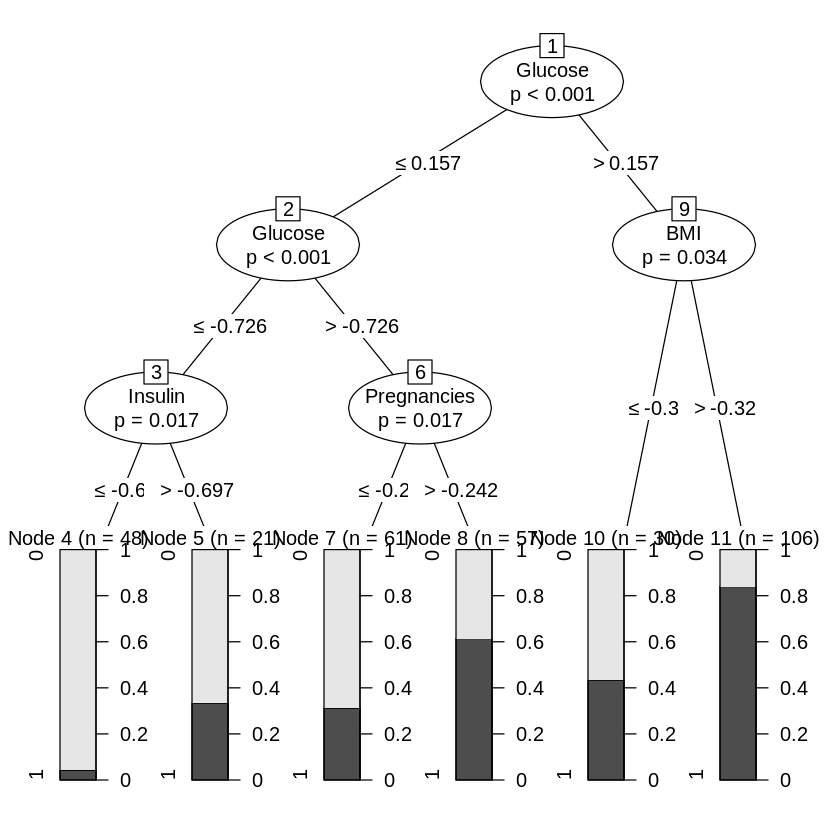

In [30]:
# Using the training_set, create a decision tree
diabetes.fit<-ctree(formula= Outcome ~ Pregnancies + Glucose + BloodPressure + SkinThickness + Insulin + BMI + DiabetesPedigreeFunction + Age, data=training_set)

diabetes.fit

plot(diabetes.fit)

# provide the accuracy of the model on the training set
lr.fold<-glm(formula = Outcome ~ Pregnancies + Glucose + BloodPressure + SkinThickness + Insulin + BMI + DiabetesPedigreeFunction + Age,
             family="binomial",
             data=training_set)
CVbinary(lr.fold)


3.2. Testing the Model


In [35]:
# Test the model using the test_set
pred_ctree<- predict(diabetes.fit, newdata = test_set, type = "response")
pred_ctree.df = t(as.data.frame(as.numeric(pred_ctree)))
vect <- c(pred_ctree.df)

outcome_test <- test_set$Outcome
roc_result = roc(vect, as.numeric(outcome_test))

# calculate the AUC
auc_best_ctree<-auc(roc_result)

# provide the AUC
cat("AUC of all variables:", auc_best_ctree)


Setting levels: control = 1, case = 2

Setting direction: controls < cases



AUC of all variables: 0.7261806

3.3. Plotting the Decision Tree using the Test Data



	 Conditional inference tree with 4 terminal nodes

Response:  Outcome 
Inputs:  Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age 
Number of observations:  139 

1) Glucose <= 0.5166756; criterion = 1, statistic = 40.337
  2) SkinThickness <= -0.2104844; criterion = 1, statistic = 16.351
    3) DiabetesPedigreeFunction <= 0.1425627; criterion = 0.954, statistic = 7.597
      4)*  weights = 34 
    3) DiabetesPedigreeFunction > 0.1425627
      5)*  weights = 11 
  2) SkinThickness > -0.2104844
    6)*  weights = 47 
1) Glucose > 0.5166756
  7)*  weights = 47 

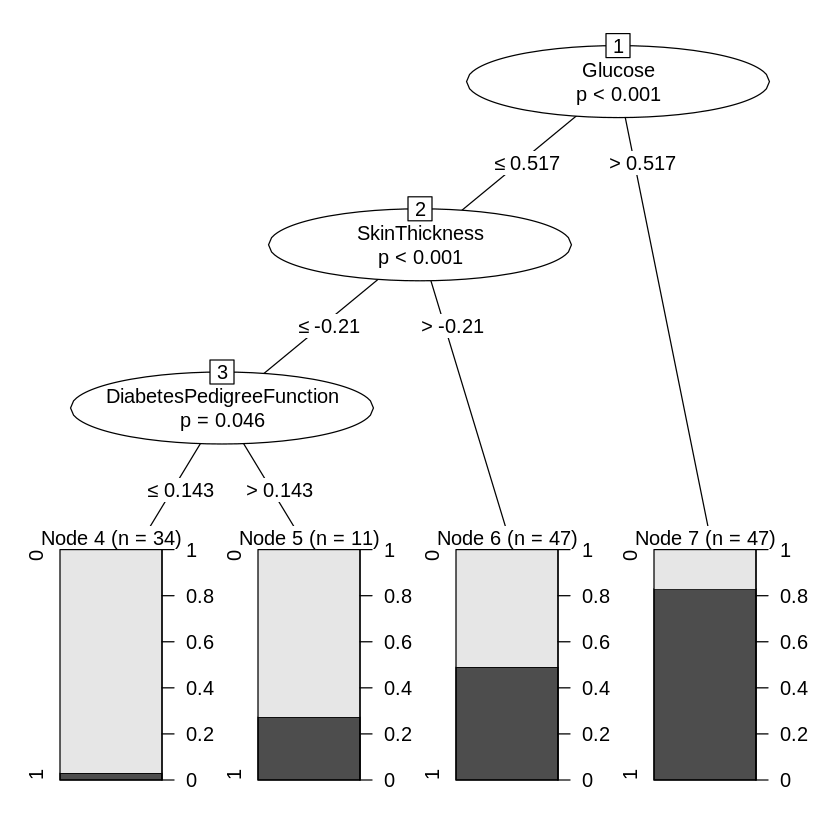

In [36]:
diabetes_test.fit<-ctree(formula=Outcome ~ Pregnancies + Glucose + BloodPressure + SkinThickness + Insulin + BMI + DiabetesPedigreeFunction + Age, data=test_set)
diabetes_test.fit
plot(diabetes_test.fit)


###5.4: Random Forest



Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Warning message in randomForest.default(m, y, ...):
“invalid mtry: reset to within valid range”
Setting levels: control = 0, case = 1

Setting direction: controls < cases

Warning message in randomForest.default(m, y, ...):
“invalid mtry: reset to within valid range”
Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Best mtry value: 2 
AUC of the best model: 0.7645289 


Setting levels: control = 0, case = 1

Setting direction: controls < cases



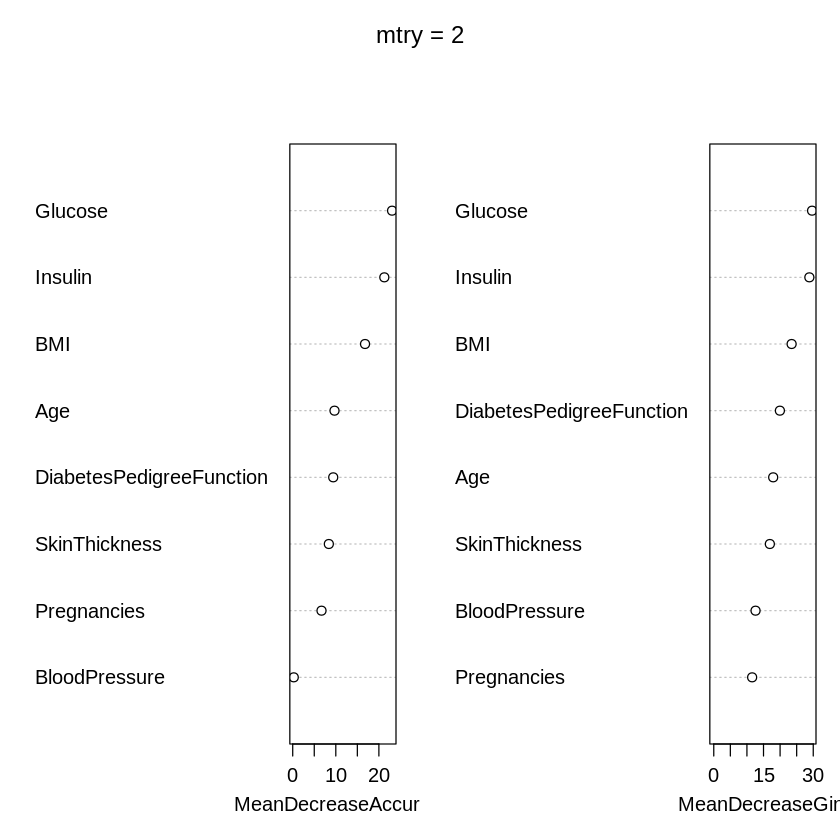

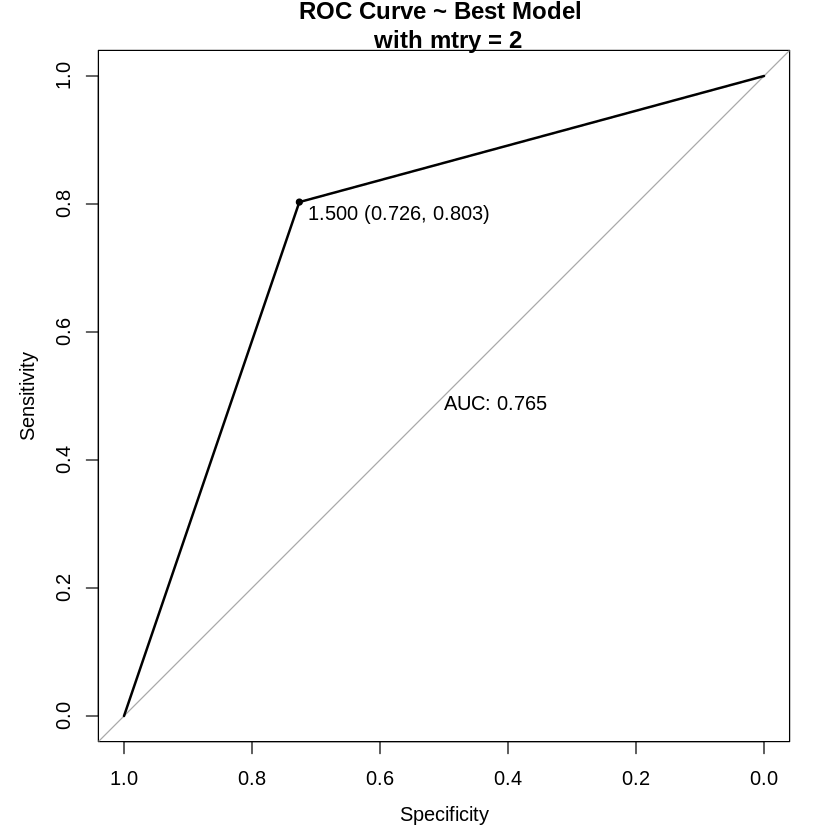

In [37]:
# Create a vector of mtry values to try for hyperparameter tuning
mtry_values <- 2:10

# Initialize an empty list to store the AUC values for each model
auc_list_rf <- list()

# Fit a random forest model for each mtry value and compute its AUC value
for (mtry in mtry_values) {
  # Fit the model
  model <- randomForest(Outcome ~ Pregnancies + Glucose + BloodPressure + SkinThickness + Insulin + BMI + DiabetesPedigreeFunction + Age,
                        data = training_set, importance = TRUE, mtry = mtry)
  # Compute the AUC value on the training set
  pred <- predict(model, newdata = training_set, type = "response")
  auc_list_rf[[as.character(mtry)]] <- roc(training_set$Outcome, as.numeric(pred))$auc
}

# Identify the mtry value with the highest AUC value
best_mtry <- names(auc_list_rf)[which.max(unlist(auc_list_rf))]

# Fit a random forest model using the best mtry value
model_best_RF <- randomForest(Outcome ~ Pregnancies + Glucose + BloodPressure + SkinThickness + Insulin + BMI + DiabetesPedigreeFunction + Age,
                            data = training_set, importance = TRUE, mtry = as.numeric(best_mtry))

# Compute the AUC value on the testing set
pred_best <- predict(model_best_RF, newdata = test_set, type = "response")
auc_best_rf <- roc(test_set$Outcome, as.numeric(pred_best))$auc

cat("Best mtry value:", best_mtry, "\n")
cat("AUC of the best model:", auc_best_rf, "\n")

# Plot the variable importance
varImpPlot(model_best_RF, main = paste0("mtry = ", best_mtry))


roc_curve <- roc(test_set$Outcome, as.numeric(pred_best))
plot(roc_curve, print.thres = "best", print.auc = TRUE, main = paste("ROC Curve ~ Best Model \n with mtry =", best_mtry))


###5.5: KNN



In [38]:
test_set_variables <- test_set[, -9]

train_set_variables <- training_set[, -9]

# Create a vector of k values to try for hyperparameter tuning
max_k <- 50

k_values <- seq(from = 5, to = max_k, by = 5)

# Initialize an empty list to store the AUC values for each model
auc_list_knn <- list()

# Fit a KNN model for each k value and compute its AUC value
for (k in k_values) {
  # Fit the model
  knn_model <- knn(train = train_set_variables,
                   test = test_set_variables,
                   cl = training_set$Outcome,
                   k = k, prob = TRUE)

  test_1 = which(knn_model == 1)
  attr(knn_model, "prob")[test_1] = 1 - attr(knn_model, "prob")[test_1]

  # Compute the AUC value
  data.knn.prob.roc = roc(as.numeric(attr(knn_model,"prob")),
                        as.numeric(test_set$Outcome))
  auc_value = auc(data.knn.prob.roc)
  #data.knn.prob.roc <- roc(test_set$Outcome, prob[, "1"])
  #auc_value <- auc(data.knn.prob.roc)
  auc_list_knn[[as.character(k)]] <- auc_value
}

# Identify the k value with the highest AUC value
best_k <- names(auc_list_knn)[which.max(unlist(auc_list_knn))]

# Fit a KNN model using the best k value

model_best_knn <- knn(train = train_set_variables,
                      test = test_set_variables,
                      cl = training_set$Outcome,
                      k = as.numeric(best_k), prob = TRUE)

test_1 = which(model_best_knn == 1)
attr(model_best_knn, "prob")[test_1] = 1 - attr(model_best_knn, "prob")[test_1]

data.knn.prob.roc.test = roc(as.numeric(attr(model_best_knn,"prob")),
                        as.numeric(test_set$Outcome))
auc_best_knn = auc(data.knn.prob.roc.test)

cat("Best k value:", best_k, "\n")
cat("AUC of the best model:", auc_best_knn, "\n")


Warning message in roc.default(as.numeric(attr(knn_model, "prob")), as.numeric(test_set$Outcome)):
“'response' has more than two levels. Consider setting 'levels' explicitly or using 'multiclass.roc' instead”
Setting levels: control = 0, case = 0.2

Setting direction: controls < cases

Warning message in roc.default(as.numeric(attr(knn_model, "prob")), as.numeric(test_set$Outcome)):
“'response' has more than two levels. Consider setting 'levels' explicitly or using 'multiclass.roc' instead”
Setting levels: control = 0, case = 0.1

Setting direction: controls < cases

Warning message in roc.default(as.numeric(attr(knn_model, "prob")), as.numeric(test_set$Outcome)):
“'response' has more than two levels. Consider setting 'levels' explicitly or using 'multiclass.roc' instead”
Setting levels: control = 0, case = 0.066666666666667

Setting direction: controls < cases

Warning message in roc.default(as.numeric(attr(knn_model, "prob")), as.numeric(test_set$Outcome)):
“'response' has more than 

Best k value: 50 
AUC of the best model: 1 


###5.6: SVM Model



In [39]:
# Define the values to test for the cost parameter

max_c <- 100

c_values <- seq(from = 5, to = max_c, by = 5)

# Define the types of kernels to test
kernel_types <- c("linear", "polynomial", "radial")

# Create a matrix to store the AUC values for each combination of kernel and cost
auc.matrix <- matrix(nrow = length(kernel_types), ncol = length(c_values))
rownames(auc.matrix) <- kernel_types
colnames(auc.matrix) <- c_values


# Train and test SVM models using different types of kernels and different values of the cost parameter
for (i in 1:length(kernel_types)) {
  for (j in 1:length(c_values)) {
    svm_model <- svm(Outcome ~ Pregnancies + Glucose + BloodPressure + SkinThickness + Insulin + BMI + DiabetesPedigreeFunction + Age, data =   training_set, kernel = kernel_types[i], cost = c_values[j], probability = T)

    data.svm.pred.prob = predict(svm_model, test_set,
                             probability=T)

    data.svm.pred.prob.mat = attr(data.svm.pred.prob, "probabilities")

    datasvmroc = roc(as.numeric(data.svm.pred.prob.mat[,2]), as.numeric(test_set$Outcome))

    auc.matrix[i,j] <- auc(datasvmroc)
  }
}

# Find the combination of kernel and cost that has the highest AUC
best.auc <- max(auc.matrix)
best.kernel <- rownames(auc.matrix)[ifelse(length(which(auc.matrix == best.auc, arr.ind = TRUE)) == 0, 1, which(auc.matrix == best.auc, arr.ind = TRUE)[1,1])]
best.cost <- colnames(auc.matrix)[ifelse(length(which(auc.matrix == best.auc, arr.ind = TRUE)) == 0, 1, which(auc.matrix == best.auc, arr.ind = TRUE)[1,2])]


# Train the final SVM model using the best combination of kernel and cost
model_best_svm <- svm(Outcome ~ Pregnancies + Glucose + BloodPressure + SkinThickness + Insulin + BMI + DiabetesPedigreeFunction + Age, data = training_set, kernel = best.kernel, cost = best.cost, probability = T)

data.svm.pred.prob.test = predict(model_best_svm, test_set,
                             probability=T)

data.svm.pred.prob.mat.test = attr(data.svm.pred.prob, "probabilities")

datasvmroc.test = roc(as.numeric(data.svm.pred.prob.mat.test[,2]), as.numeric(test_set$Outcome))

auc_best_svm <- auc(datasvmroc.test)

cat("Best c value:", best.cost, "\n")
cat("Best kernel type:", best.kernel, "\n")

cat("AUC of the best model:", auc_best_svm, "\n")


Warning message in roc.default(as.numeric(data.svm.pred.prob.mat[, 2]), as.numeric(test_set$Outcome)):
“'response' has more than two levels. Consider setting 'levels' explicitly or using 'multiclass.roc' instead”
Setting levels: control = 0.056799180789155, case = 0.0898100849084722

Setting direction: controls < cases

Warning message in roc.default(as.numeric(data.svm.pred.prob.mat[, 2]), as.numeric(test_set$Outcome)):
“'response' has more than two levels. Consider setting 'levels' explicitly or using 'multiclass.roc' instead”
Setting levels: control = 0.057491338457258, case = 0.0901512437937808

Setting direction: controls < cases

Warning message in roc.default(as.numeric(data.svm.pred.prob.mat[, 2]), as.numeric(test_set$Outcome)):
“'response' has more than two levels. Consider setting 'levels' explicitly or using 'multiclass.roc' instead”
Setting levels: control = 0.0621076694505999, case = 0.0957360224979917

Setting direction: controls < cases

Warning message in roc.default(as

Best c value: 5 
Best kernel type: polynomial 
AUC of the best model: 0.5 


 ### 5.7. Neural Networks

Neural networks take a set of inputs and create a function for each to help predict the output. The functions are randomly initialized and then progressively improved to best fit the data.

7.1. Fixing zero values


In [41]:
diabetes_nn <- read.csv("PimaIndiansDiabetes.csv", header = T) #read the data.csv in and call it cancer_data

#Solve missing values
diabetes0_nn <- diabetes_nn[, c("Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI")]

diabetes0_nn[diabetes0_nn=='0']=NA #Replacing 0 with NA

summary(diabetes0_nn) #show the NA present in each variable

diabetes0_nn<-kNN(diabetes0_nn,k=sqrt(nrow(diabetes0_nn))) #KNN Imputation method to remove NA. The square root of number of rows in the dataset because the "optimal K value usually found is the square root of N, where N is the total number of samples".

summary(diabetes0_nn)

#extract the necessary variables
diabetes0_nn=diabetes0_nn[,1:5]

#Replace processed variables back into the dataset

diabetes_nn$Glucose=diabetes0_nn$Glucose
diabetes_nn$BloodPressure=diabetes0_nn$BloodPressure
diabetes_nn$SkinThickness=diabetes0_nn$SkinThickness
diabetes_nn$Insulin=diabetes0_nn$Insulin
diabetes_nn$BMI=diabetes0_nn$BMI

summary(diabetes_nn)


    Glucose      BloodPressure    SkinThickness      Insulin     
 Min.   : 44.0   Min.   : 24.00   Min.   : 7.00   Min.   : 14.0  
 1st Qu.: 99.0   1st Qu.: 64.00   1st Qu.:21.00   1st Qu.: 75.0  
 Median :116.0   Median : 72.00   Median :29.00   Median :121.0  
 Mean   :121.3   Mean   : 72.21   Mean   :29.11   Mean   :153.8  
 3rd Qu.:140.5   3rd Qu.: 80.00   3rd Qu.:36.00   3rd Qu.:190.0  
 Max.   :199.0   Max.   :122.00   Max.   :99.00   Max.   :846.0  
 NA's   :5       NA's   :32       NA's   :196     NA's   :322    
      BMI      
 Min.   :18.2  
 1st Qu.:27.3  
 Median :32.0  
 Mean   :32.3  
 3rd Qu.:36.6  
 Max.   :67.1  
 NA's   :9     

    Glucose      BloodPressure    SkinThickness      Insulin     
 Min.   : 44.0   Min.   : 24.00   Min.   : 7.00   Min.   : 14.0  
 1st Qu.: 99.0   1st Qu.: 64.00   1st Qu.:22.00   1st Qu.: 81.0  
 Median :116.0   Median : 72.00   Median :30.00   Median :122.0  
 Mean   :121.2   Mean   : 72.33   Mean   :28.95   Mean   :142.2  
 3rd Qu.:140.0   3rd Qu.: 80.00   3rd Qu.:33.00   3rd Qu.:170.0  
 Max.   :199.0   Max.   :122.00   Max.   :99.00   Max.   :846.0  
      BMI        Glucose_imp     BloodPressure_imp SkinThickness_imp
 Min.   :18.20   Mode :logical   Mode :logical     Mode :logical    
 1st Qu.:27.40   FALSE:663       FALSE:636         FALSE:472        
 Median :32.05   TRUE :5         TRUE :32          TRUE :196        
 Mean   :32.31                                                      
 3rd Qu.:36.50                                                      
 Max.   :67.10                                                      
 Insulin_imp      BMI_imp       
 Mode :logical   Mode 

  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   : 44.0   Min.   : 24.00   Min.   : 7.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 64.00   1st Qu.:22.00  
 Median : 3.000   Median :116.0   Median : 72.00   Median :30.00  
 Mean   : 3.813   Mean   :121.2   Mean   : 72.33   Mean   :28.95  
 3rd Qu.: 6.000   3rd Qu.:140.0   3rd Qu.: 80.00   3rd Qu.:33.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   : 14.0   Min.   :18.20   Min.   :0.0780           Min.   :21.00  
 1st Qu.: 81.0   1st Qu.:27.40   1st Qu.:0.2387           1st Qu.:24.00  
 Median :122.0   Median :32.05   Median :0.3770           Median :29.00  
 Mean   :142.2   Mean   :32.31   Mean   :0.4773           Mean   :33.09  
 3rd Qu.:170.0   3rd Qu.:36.50   3rd Qu.:0.6412           3rd Qu.:40.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
    Outcome  

7.2. Scaling data


In [42]:
#scale the data

maxs = apply(diabetes_nn[,-9], 2, max)
mins = apply(diabetes_nn[,-9], 2, min)

scaled.data = as.data.frame(scale(diabetes_nn[,-9],
                                  center=mins,
                                  scale = maxs-mins))

results <- diabetes_nn$Outcome

scaled.data.df = cbind(scaled.data, results)

head(scaled.data.df)
# Balance the dataset --> balancing the classes by randomly undersampling the majority class (class with more samples) to match the number of samples in the minority class (class with fewer samples).


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,results
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,0.35294118,0.6709677,0.4897959,0.3043478,0.18870192,0.3149284,0.23441503,0.4833333,1
2,0.05882353,0.2645161,0.4285714,0.2391304,0.06850962,0.1717791,0.11656704,0.1666667,0
3,0.47058824,0.8967742,0.4081633,0.2282609,0.19350962,0.1042945,0.25362938,0.1833333,1
4,0.05882353,0.2903226,0.4285714,0.1739130,0.09615385,0.2024540,0.03800171,0.0000000,0
5,0.00000000,0.6000000,0.1632653,0.3043478,0.18509615,0.5092025,0.94363792,0.2000000,1
6,0.29411765,0.4645161,0.5102041,0.1630435,0.10937500,0.1513292,0.05251921,0.1500000,0



7.3. Partitioning the Data


In [43]:
features <- scaled.data.df[, -9]
outcome <- scaled.data.df$results

all_0_nn <- scaled.data.df[outcome == 0, ]
all_1_nn <- scaled.data.df[outcome == 1, ]

sampled_0_nn <- all_0_nn[sample(nrow(all_0_nn), nrow(all_1_nn)), ]

balanced_diabetes_nn <- rbind(sampled_0_nn, all_1_nn)

# Randomly remove 20% of the data and save it as test_set and the other 80% as training_set.
train_indices_nn <- sample(1:nrow(balanced_diabetes_nn), round(0.8 * nrow(balanced_diabetes_nn)))

# create the training set
training_set_nn <- balanced_diabetes_nn[train_indices_nn, ]

# create the test set
test_set_nn <- balanced_diabetes_nn[-train_indices_nn, ]



7.4. Building Model


In [44]:
test_set_nn_var <- test_set_nn[,-9]

# Define the values to hidden nodes

n_values <- c(5, 10, 15, 20)

# Initialize an empty list to store the AUC values for each model
auc_list_nn <- list()

# Fit a NN model for each k value and compute its AUC value
for (n in n_values) {
  # Fit the model
  nn_model <- neuralnet(results ~ Pregnancies + Glucose + BloodPressure + SkinThickness + Insulin + BMI + DiabetesPedigreeFunction + Age,
                   data= training_set_nn,
                   hidden = c(n), rep=1, linear.output = F)

  nn_results = compute(nn_model, test_set_nn_var)$net.result

  data.nn.roc = roc(as.numeric(nn_results), as.numeric(test_set_nn$results))

  auc_value_nn = auc(data.nn.roc)

  auc_list_nn[[as.character(n)]] <- auc_value_nn
}

# Identify the n value with the highest AUC value
best_n <- names(auc_list_nn)[which.max(unlist(auc_list_nn))]

# Fit a NN model using the best n value
best.model.nn = neuralnet(results ~ Pregnancies + Glucose + BloodPressure + SkinThickness + Insulin + BMI + DiabetesPedigreeFunction + Age, data= training_set_nn, hidden=c(as.numeric(n)), rep=1, linear.output = F)

best.model.nn.results = compute(best.model.nn, test_set_nn_var)$net.result

data.nn.roc.best = roc(as.numeric(best.model.nn.results), as.numeric(test_set_nn$results))

best_auc_value_nn = auc(data.nn.roc.best)

cat("Best n value:", best_n, "\n")
cat("AUC of the best model:", best_auc_value_nn, "\n")


Warning message in roc.default(as.numeric(nn_results), as.numeric(test_set_nn$results)):
“'response' has more than two levels. Consider setting 'levels' explicitly or using 'multiclass.roc' instead”
Setting levels: control = 1.27448800911623e-65, case = 6.47128893990252e-57

Setting direction: controls < cases

Warning message in roc.default(as.numeric(nn_results), as.numeric(test_set_nn$results)):
“'response' has more than two levels. Consider setting 'levels' explicitly or using 'multiclass.roc' instead”
Setting levels: control = 1.54864250364197e-69, case = 3.08777388863604e-66

Setting direction: controls < cases

Warning message in roc.default(as.numeric(nn_results), as.numeric(test_set_nn$results)):
“'response' has more than two levels. Consider setting 'levels' explicitly or using 'multiclass.roc' instead”
Setting levels: control = 2.24177701989333e-62, case = 1.34797861513627e-55

Setting direction: controls < cases

Warning message in roc.default(as.numeric(nn_results), as.num

Best n value: 5 
AUC of the best model: 0.5 


###Model Comparison


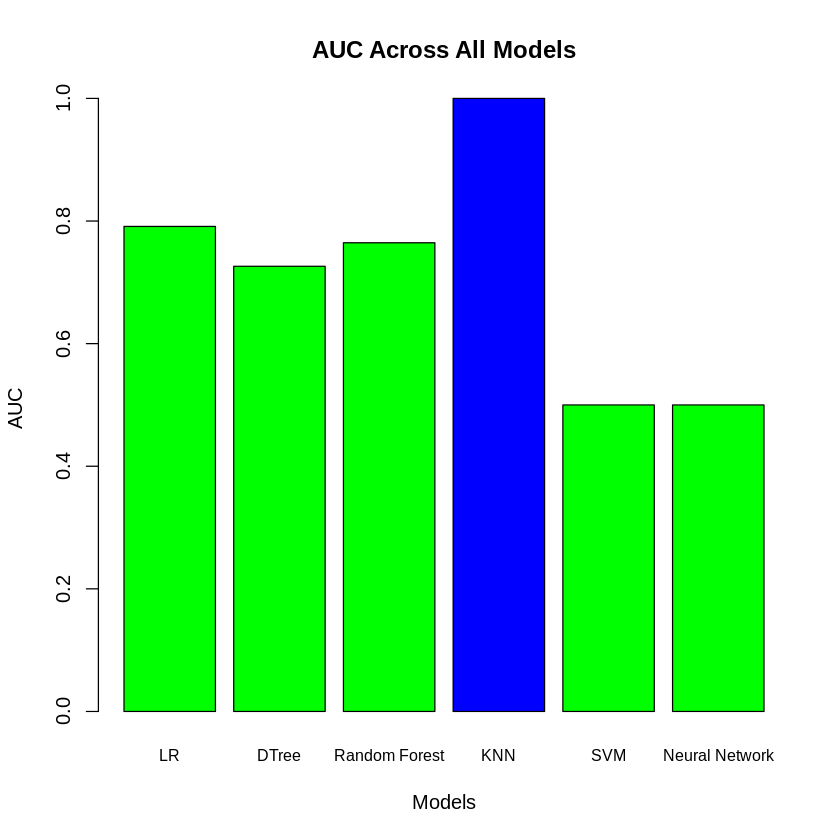

In [45]:
finalauc<-c(allvarauc_lr, auc_best_ctree, auc_best_rf, auc_best_knn, auc_best_svm, best_auc_value_nn)
aucnames<-c("LR", "DTree", "Random Forest", "KNN", "SVM", "Neural Network")
highest_value <- max(finalauc)

# Create the bar plot with different colors for the highest value
barplot(finalauc, col=ifelse(finalauc==highest_value, "blue", "green"),
        main="AUC Across All Models",
        xlab="Models", ylab="AUC", names.arg=aucnames, cex.names=0.8)

#The blue colored column indicates the variable which has the highest AUC. According to the barplot, the KNN Model pertaining to all the variables have the highest AUC, suggesting that the model has the best discrimination performance whereby it is able to distinguish between the diabetic and non-diabetic cases with a high degree of accuracy.
